This notebook uses the functions `sourmashconsumr::from_taxonomy_annotate_to_multi_strains()` to detect whether samples in an infant stool metagenome time series (PRJNA60717) contain multiple strains of any species.

In [1]:
# remotes::install_github("Arcadia-Science/sourmashconsumr", force = T)

Skipping 1 packages not available: phyloseq

Running `R CMD build`...



* checking for file ‘/private/var/folders/76/q53ldgh1667_lm49fpxybglc0000gn/T/Rtmpz7IWRJ/remotes16cba53b19f3a/Arcadia-Science-sourmashconsumr-f7e1501/DESCRIPTION’ ... OK
* preparing ‘sourmashconsumr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘sourmashconsumr_0.1.0.tar.gz’


In [80]:
library(sourmashconsumr)
library(dplyr, warn.conflicts = F)
library(ggplot2)
library(ggrepel)
library(grid)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# set working directory to one level up, root of git repo
setwd("..")

In [3]:
infant_taxonomy_annotate_df <- read_taxonomy_annotate(Sys.glob("outputs/sourmash_taxonomy/day*.with-lineages.csv"))

## Staphylococcus epidermidis

In [4]:
infant_taxonomy_annotate_df_staph_epi <- infant_taxonomy_annotate_df %>%
  filter(species == "Staphylococcus epidermidis")

In [5]:
infant_multi_strain_staph_epi <- from_taxonomy_annotate_to_multi_strains(infant_taxonomy_annotate_df_staph_epi)

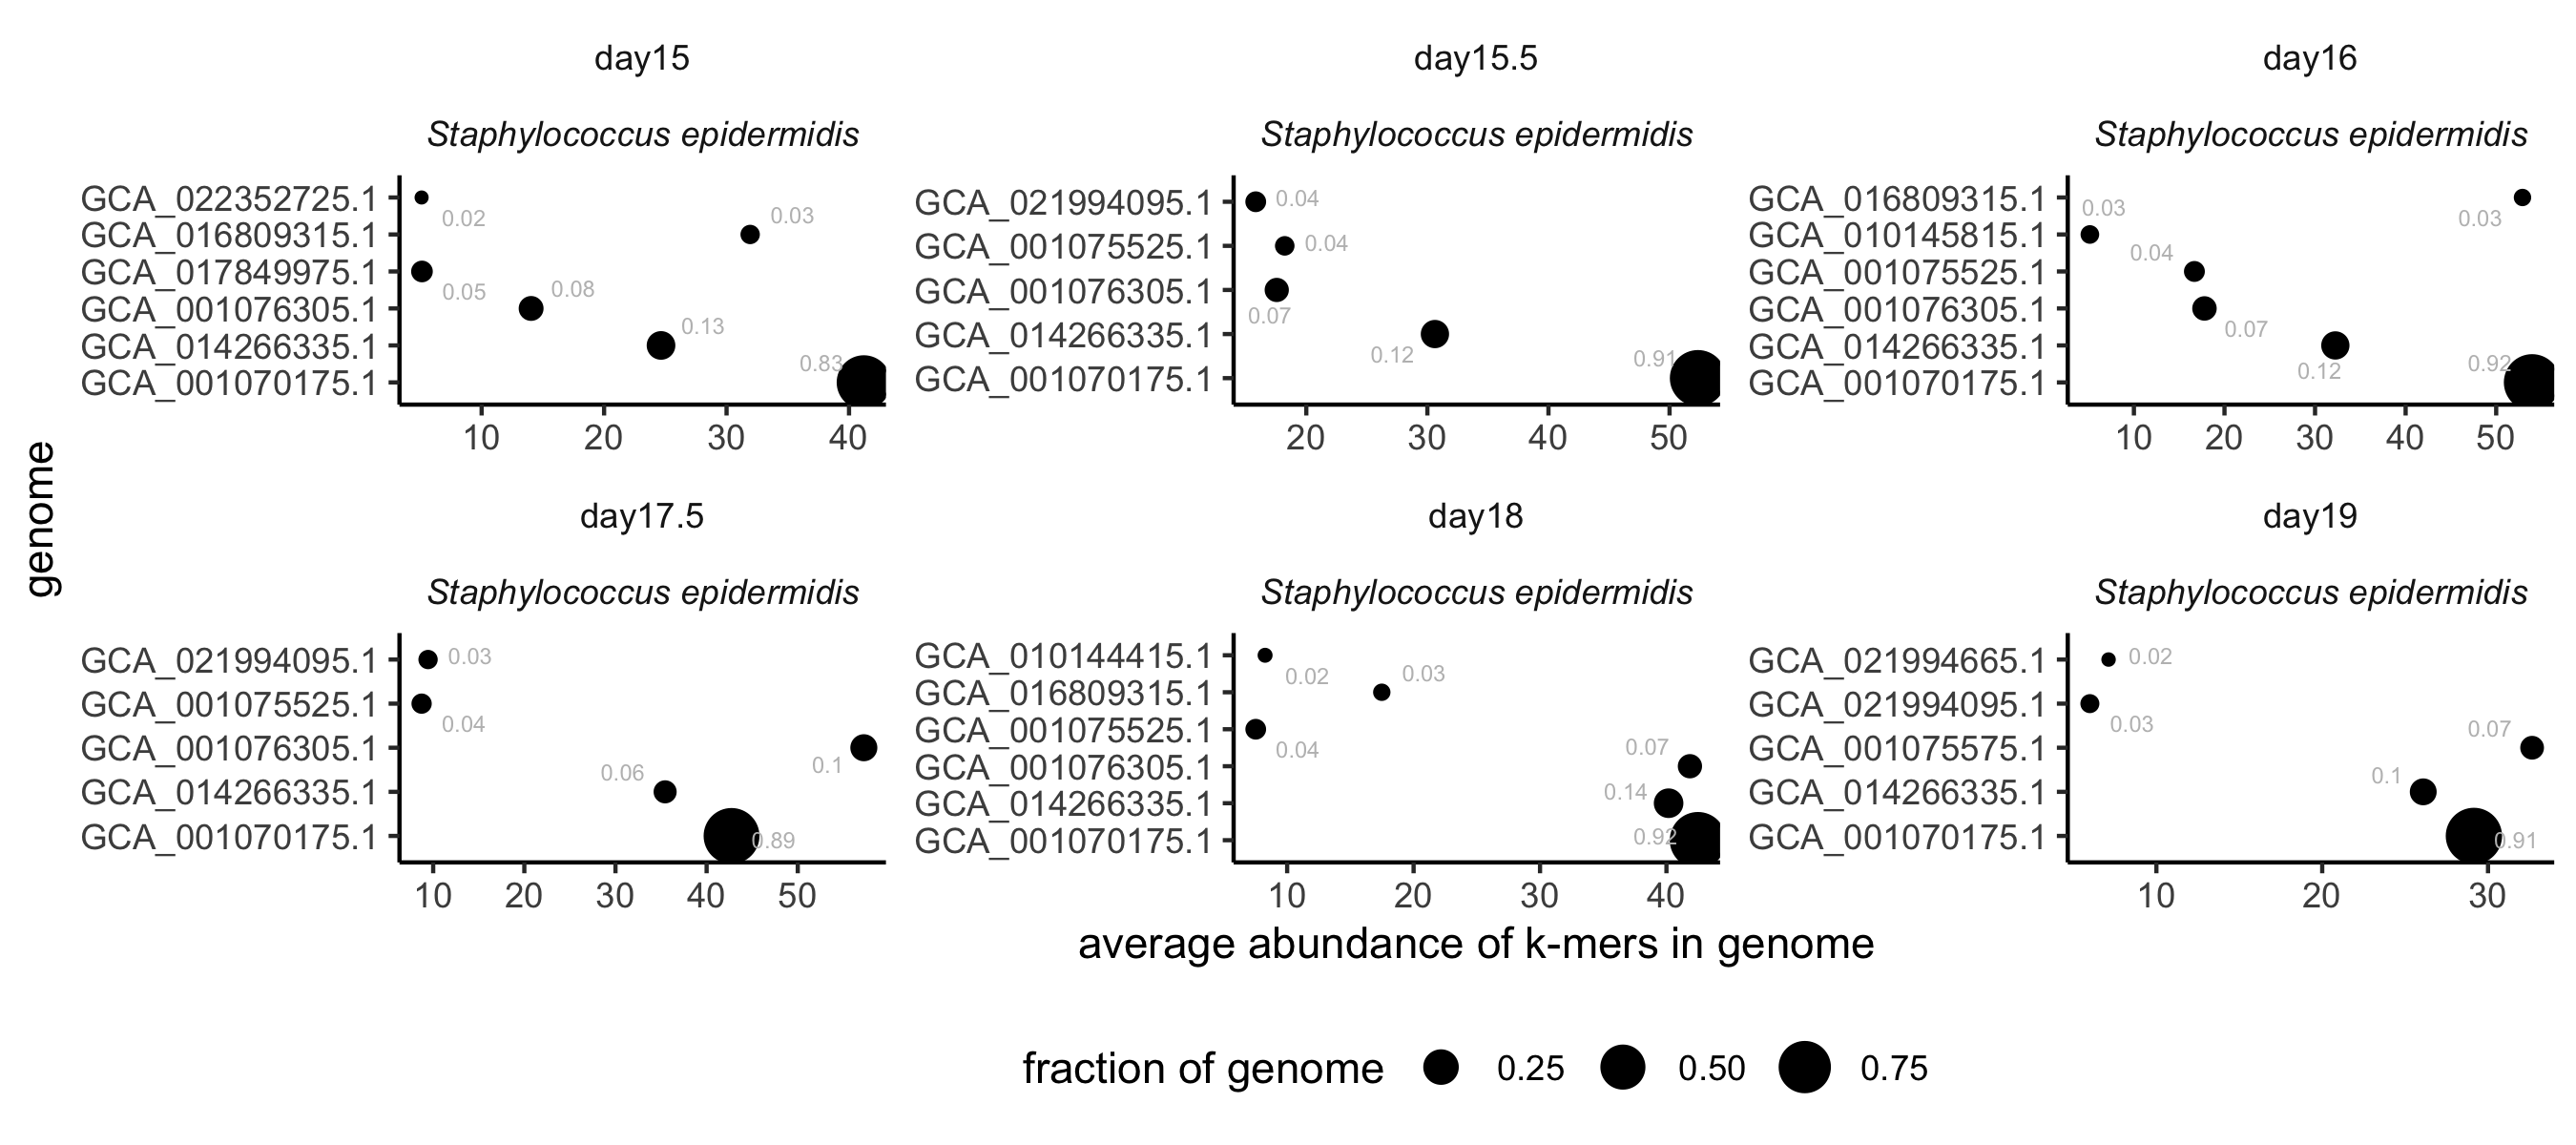

In [11]:
# View default plot from package
# adjust plot size rendered inline
options(repr.plot.width = 9, repr.plot.height = 4, repr.plot.res = 300)

infant_multi_strain_staph_epi$plt + 
 theme(legend.position = "bottom") 

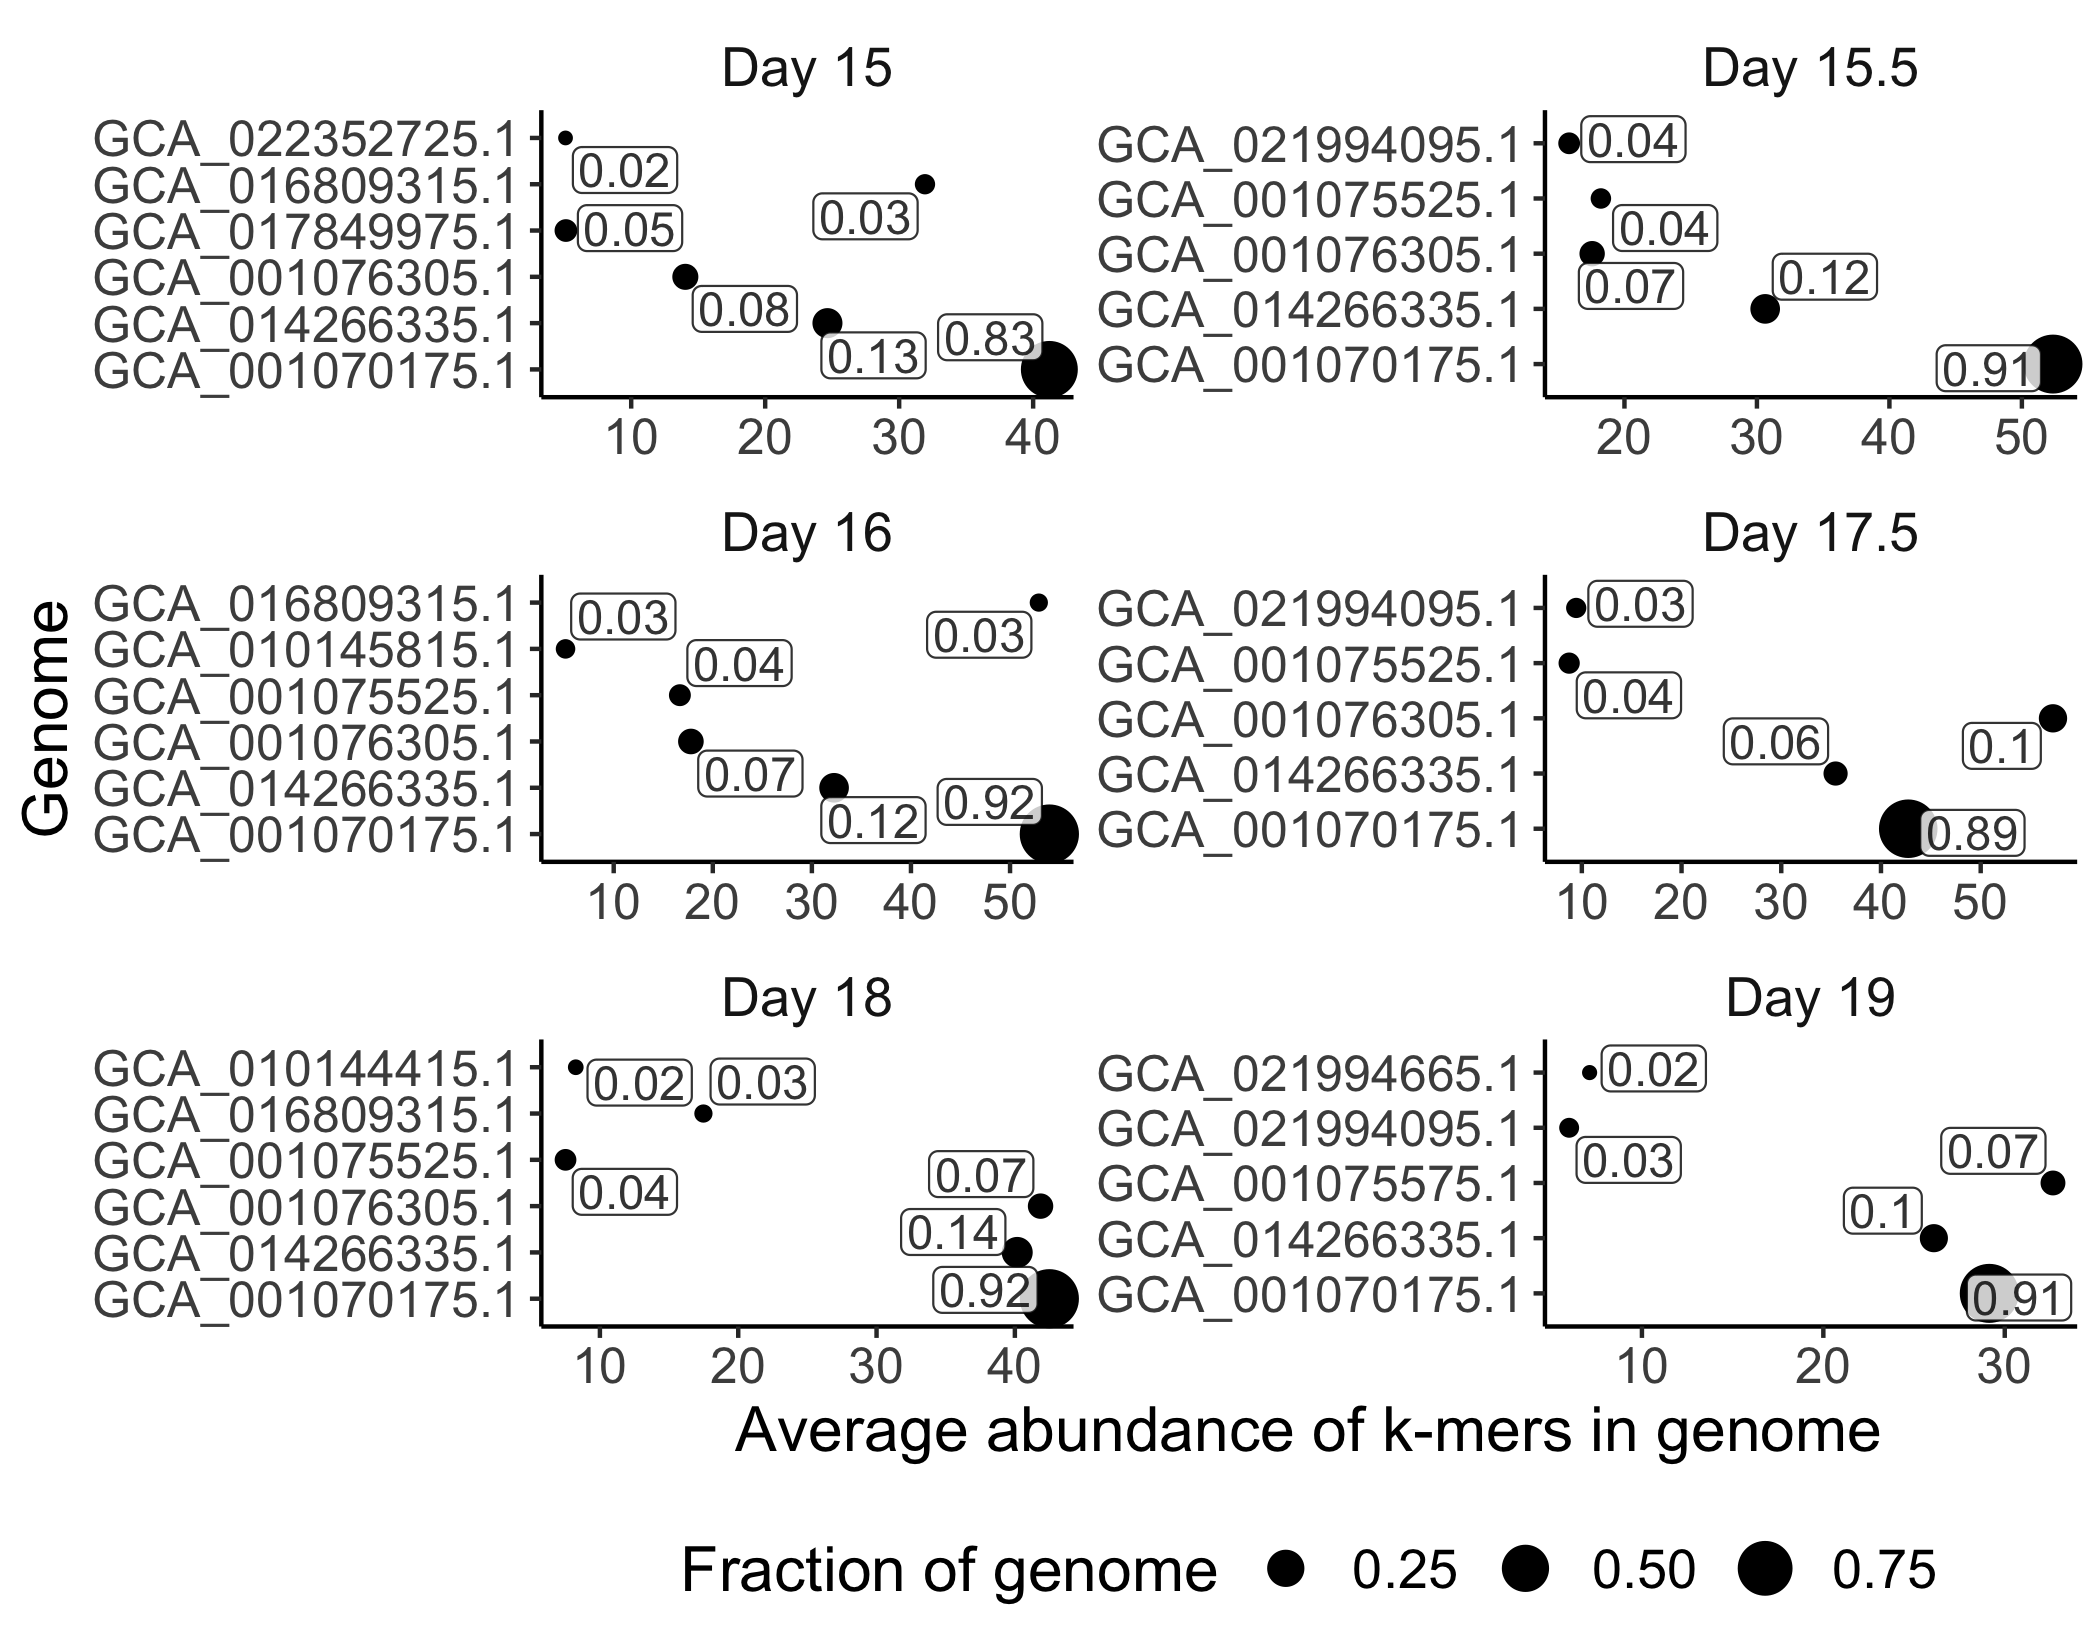

In [50]:
options(repr.plot.width = 7, repr.plot.height = 5.5, repr.plot.res = 300)

set.seed(1)
# use the returned plot data to customize the plot for the pub
plt <- ggplot(infant_multi_strain_staph_epi$plt_data %>%
        mutate(query_name = gsub("day", "Day ", query_name)), 
       aes(x = reorder(genome_accession, -f_match),
           y = average_abund,
           label = round(f_match, digits = 2))) +
    geom_point(ggplot2::aes(size = f_match)) +
    coord_flip(clip = "off") +
    facet_wrap(~query_name, scales = "free", nrow = 3) +
    geom_label_repel(size = 4, color = "black", force = 3, box.padding = 0.1, label.padding = 0.1, alpha = 0.8) +
    theme_classic() +
    theme(strip.background = ggplot2::element_blank(),
          legend.position = "bottom",
          axis.text = element_text(size = 12),
          axis.title = element_text(size = 15),
          legend.text = element_text(size = 13), 
          legend.title = element_text(size = 15),
          strip.text = element_text(size = 13)) +
    labs(y = "Average abundance of k-mers in genome",
         x = "Genome",
         size = "Fraction of genome")
plt

In [51]:
pdf("figures/fig12_sepi.pdf", width = 7, height = 5.5)
plt
dev.off()
png("figures/fig12_sepi.png", width = 7, height = 5.5, units = "in", res = 300)
plt
dev.off()
svg("figures/fig12_sepi.svg", width = 7, height = 5.5)
plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## Enterococcus faecalis

In [52]:
infant_taxonomy_annotate_df_e_faec <- infant_taxonomy_annotate_df %>%
  filter(species == "Enterococcus faecalis")

In [53]:
infant_multi_strain_e_faec <- from_taxonomy_annotate_to_multi_strains(infant_taxonomy_annotate_df_e_faec, 
                                                                      plot_threshold = 0.015)

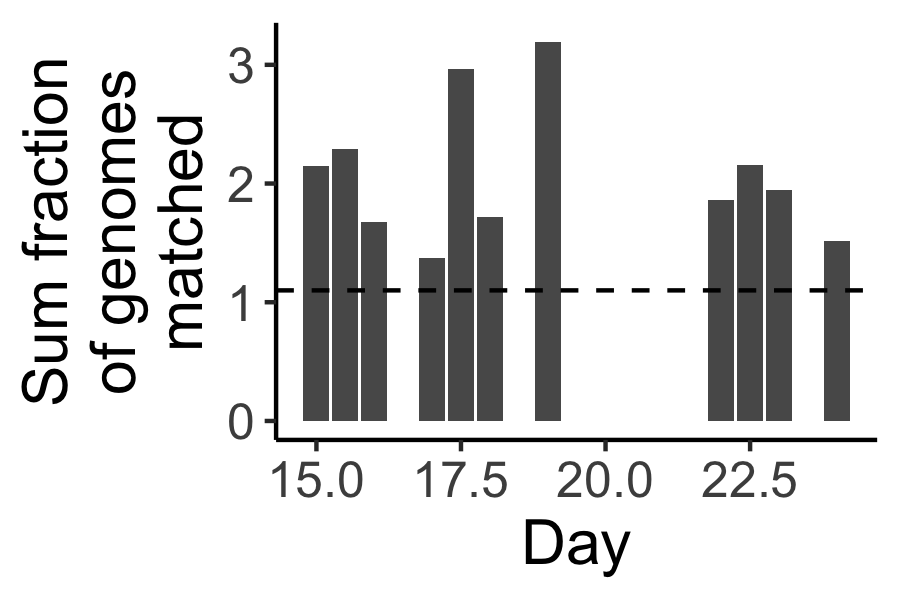

In [120]:
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 300)

efaec_plt1 <- ggplot(infant_multi_strain_e_faec$candidate_species_with_multiple_strains %>%
         mutate(query_name = as.numeric(gsub("day", "", query_name))),
       aes(x = query_name, y = species_f_match)) +
  geom_col() +
  theme_classic() +
  labs(x = "Day", y = "Sum fraction\nof genomes\nmatched") +
  geom_hline(yintercept = 1.1, linetype = "dashed") +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 15))

efaec_plt1

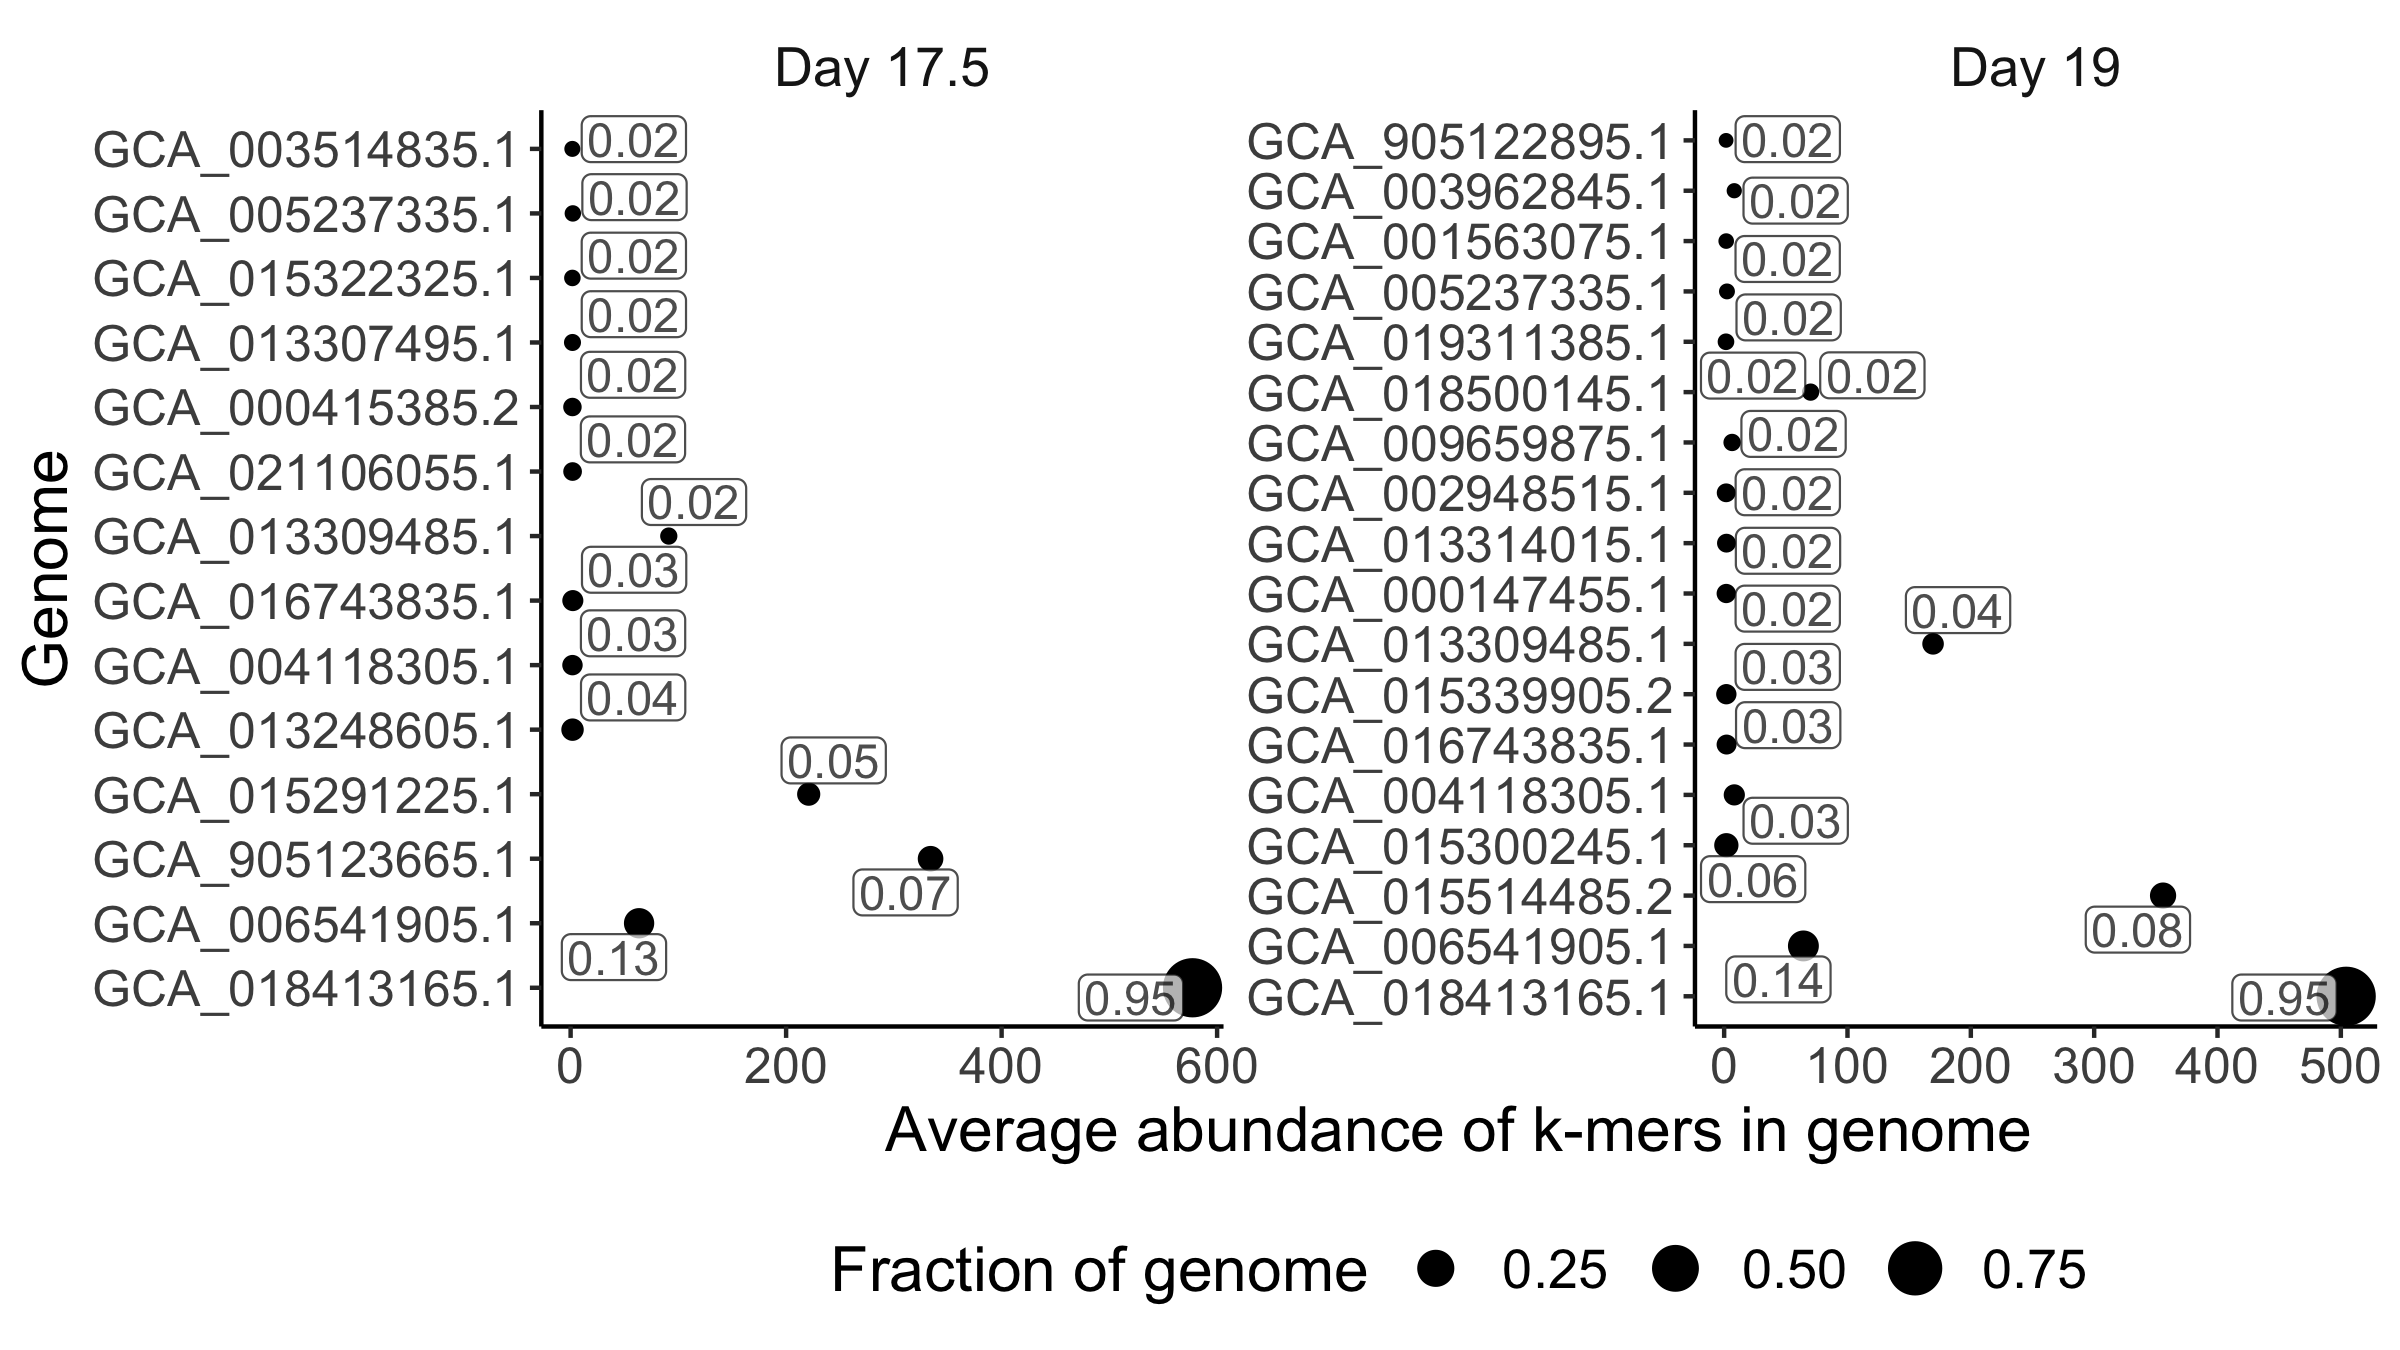

In [121]:
# adjust plot size rendered inline
options(repr.plot.width = 8, repr.plot.height = 4.5, repr.plot.res = 300)

efaec_plt2 <- ggplot(infant_multi_strain_e_faec$plt_data %>%
              mutate(query_name = gsub("day", "Day ", query_name)) %>%
              filter(query_name %in% c("Day 17.5", "Day 19")), 
       aes(x = reorder(genome_accession, -f_match),
           y = average_abund,
           label = round(f_match, digits = 2))) +
    geom_point(ggplot2::aes(size = f_match)) +
    coord_flip(clip = "off") +
    facet_wrap(~query_name, scales = "free", nrow = 1) +
    geom_label_repel(size = 4, color = "black", force = 3, box.padding = 0.1, label.padding = 0.1, alpha = 0.7) +
    theme_classic() +
    theme(strip.background = ggplot2::element_blank(),
          legend.position = "bottom",
          axis.text = element_text(size = 12),
          axis.title = element_text(size = 15),
          legend.text = element_text(size = 13), 
          legend.title = element_text(size = 15),
          strip.text = element_text(size = 13)) +
    labs(y = "Average abundance of k-mers in genome",
         x = "Genome",
         size = "Fraction of genome")
efaec_plt2

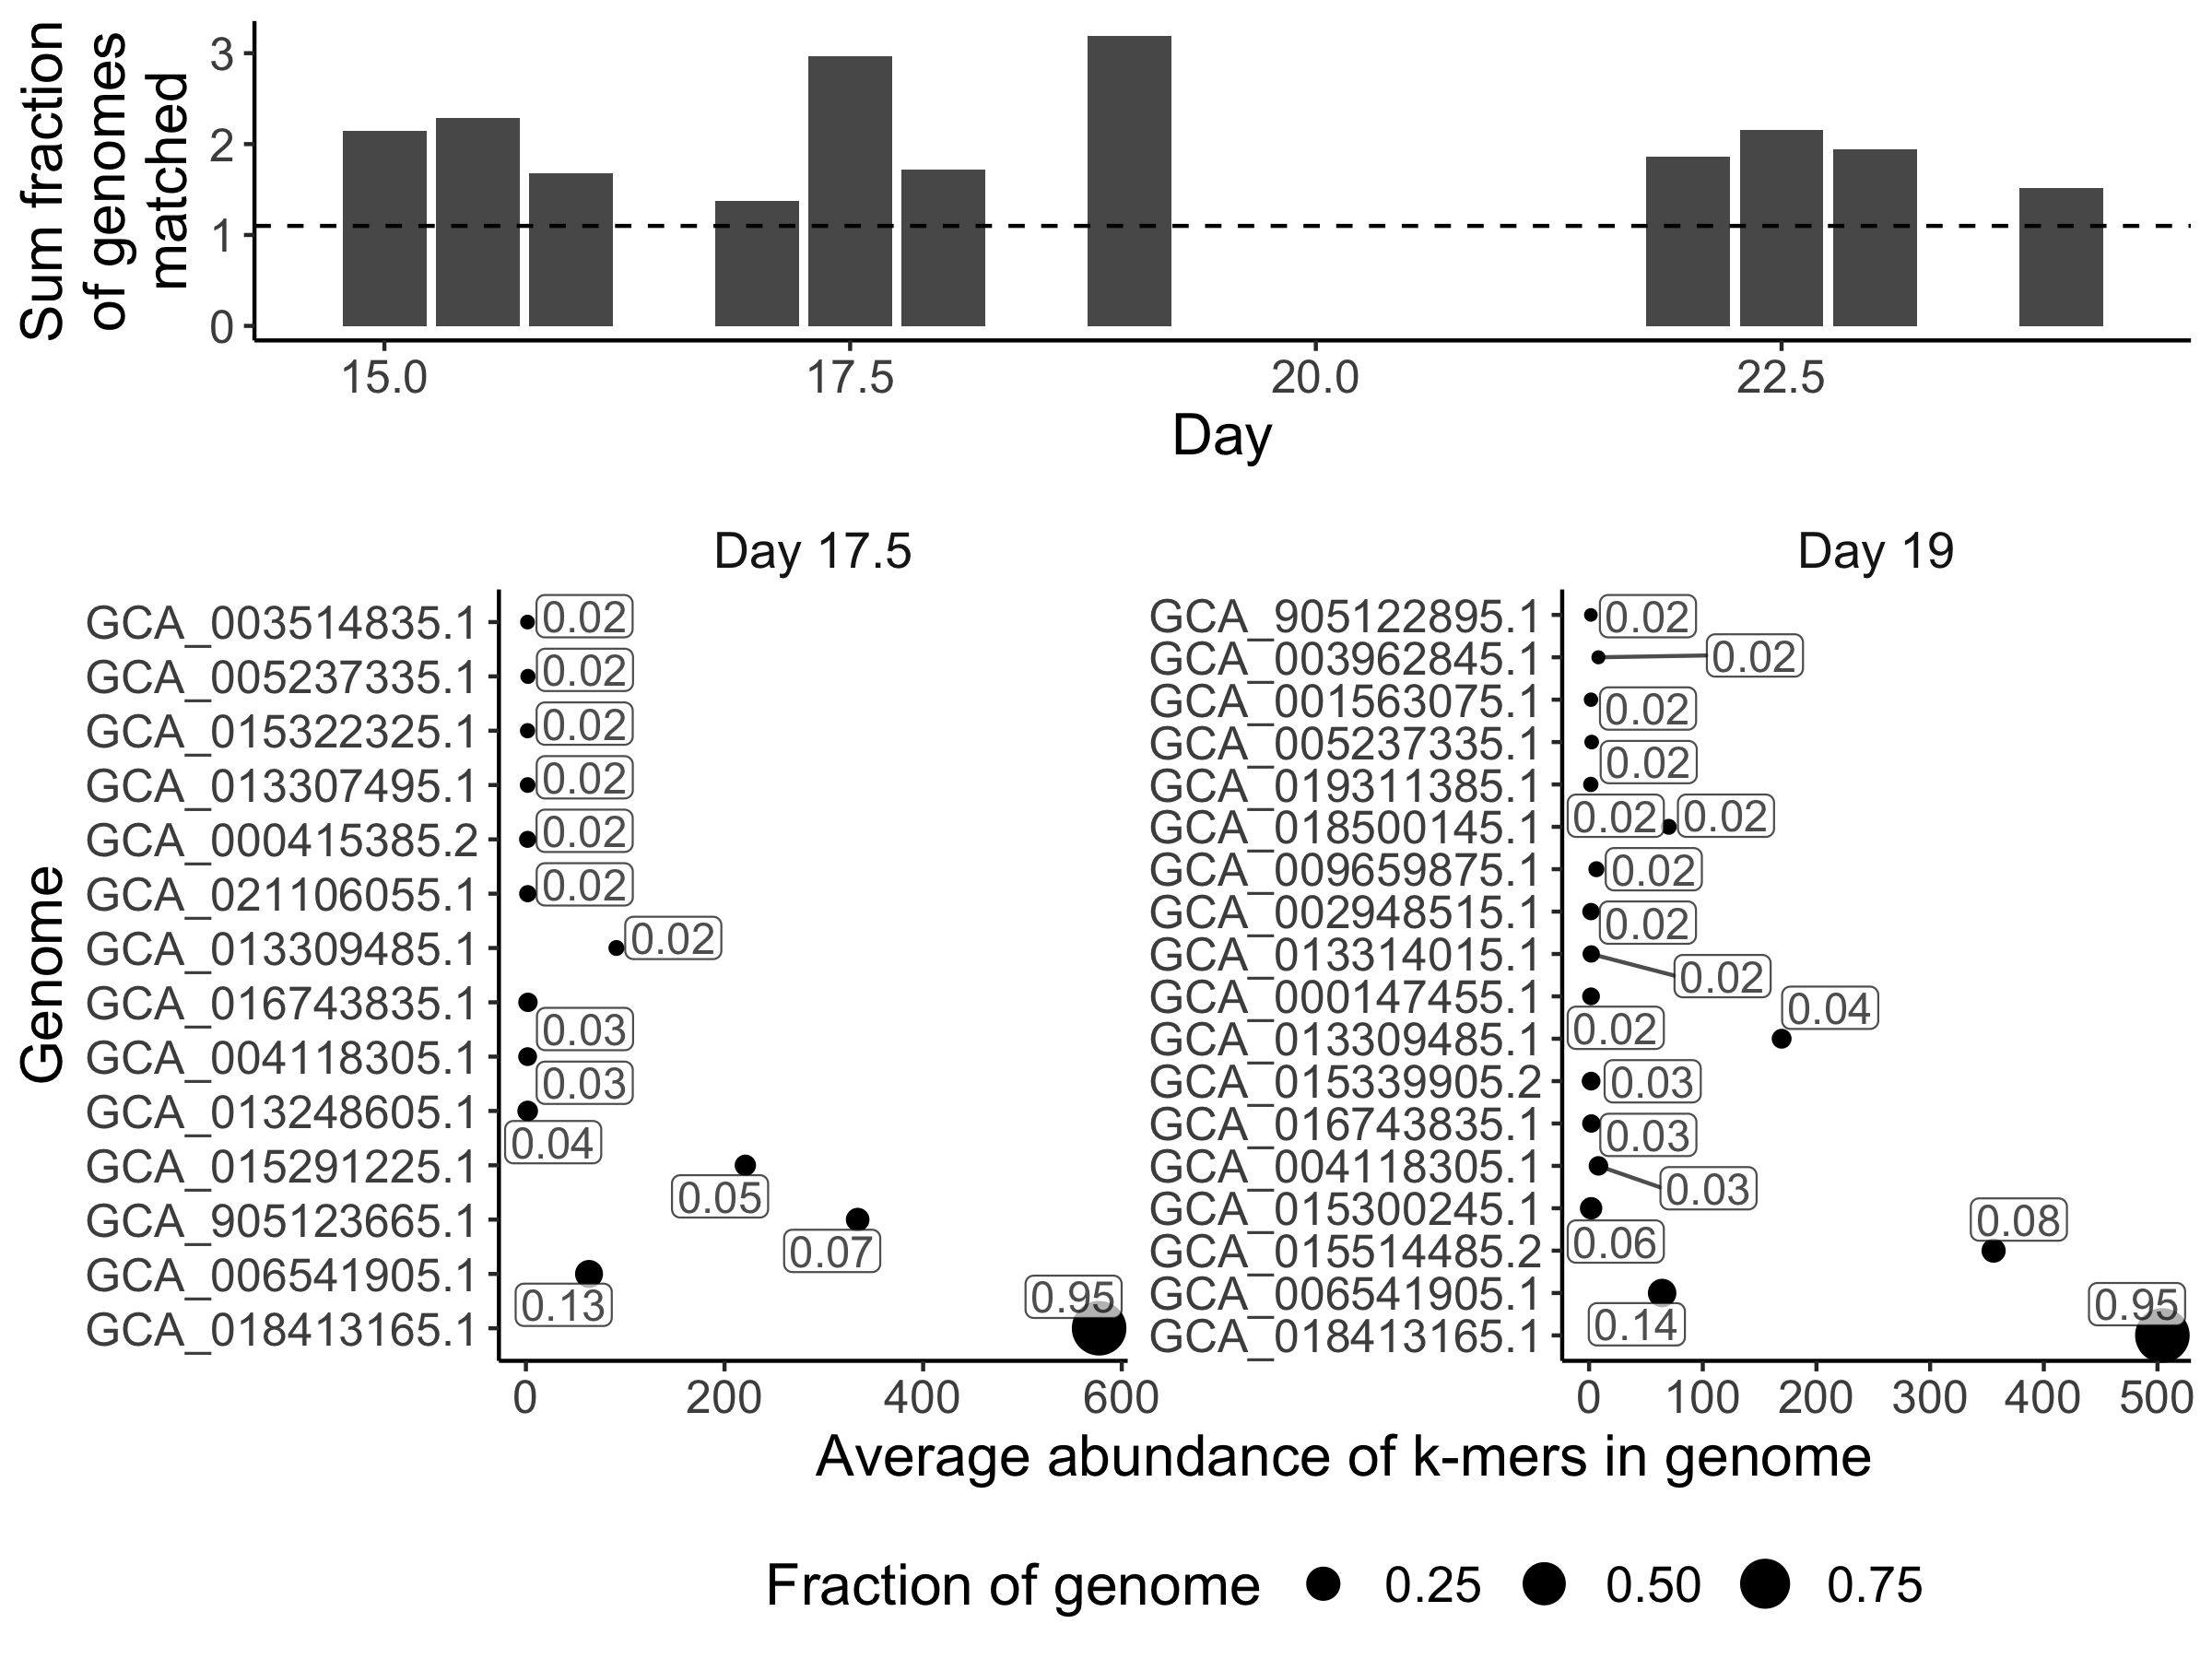

In [126]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)

efaec_plt <- ggpubr::ggarrange(efaec_plt1, efaec_plt2, ncol = 1, nrow = 2, heights = c(1.25, 3))

efaec_plt

In [127]:
pdf("figures/fig13_ef.pdf", width = 8, height = 6)
efaec_plt
dev.off()
png("figures/fig13_ef.png", width = 8, height = 6, units = "in", res = 300)
efaec_plt
dev.off()
svg("figures/fig13_ef.svg", width = 8, height = 6)
efaec_plt
dev.off()

quartz_off_screen 
                2

quartz_off_screen 
                2

quartz_off_screen 
                2

## Finegoldia magna

In [12]:
infant_taxonomy_annotate_df_f_magna <- infant_taxonomy_annotate_df %>%
  filter(species == "Finegoldia magna")

In [13]:
infant_multi_strain_f_magna <- from_taxonomy_annotate_to_multi_strains(infant_taxonomy_annotate_df_f_magna, 
                                                                       plot_threshold = 0.01)

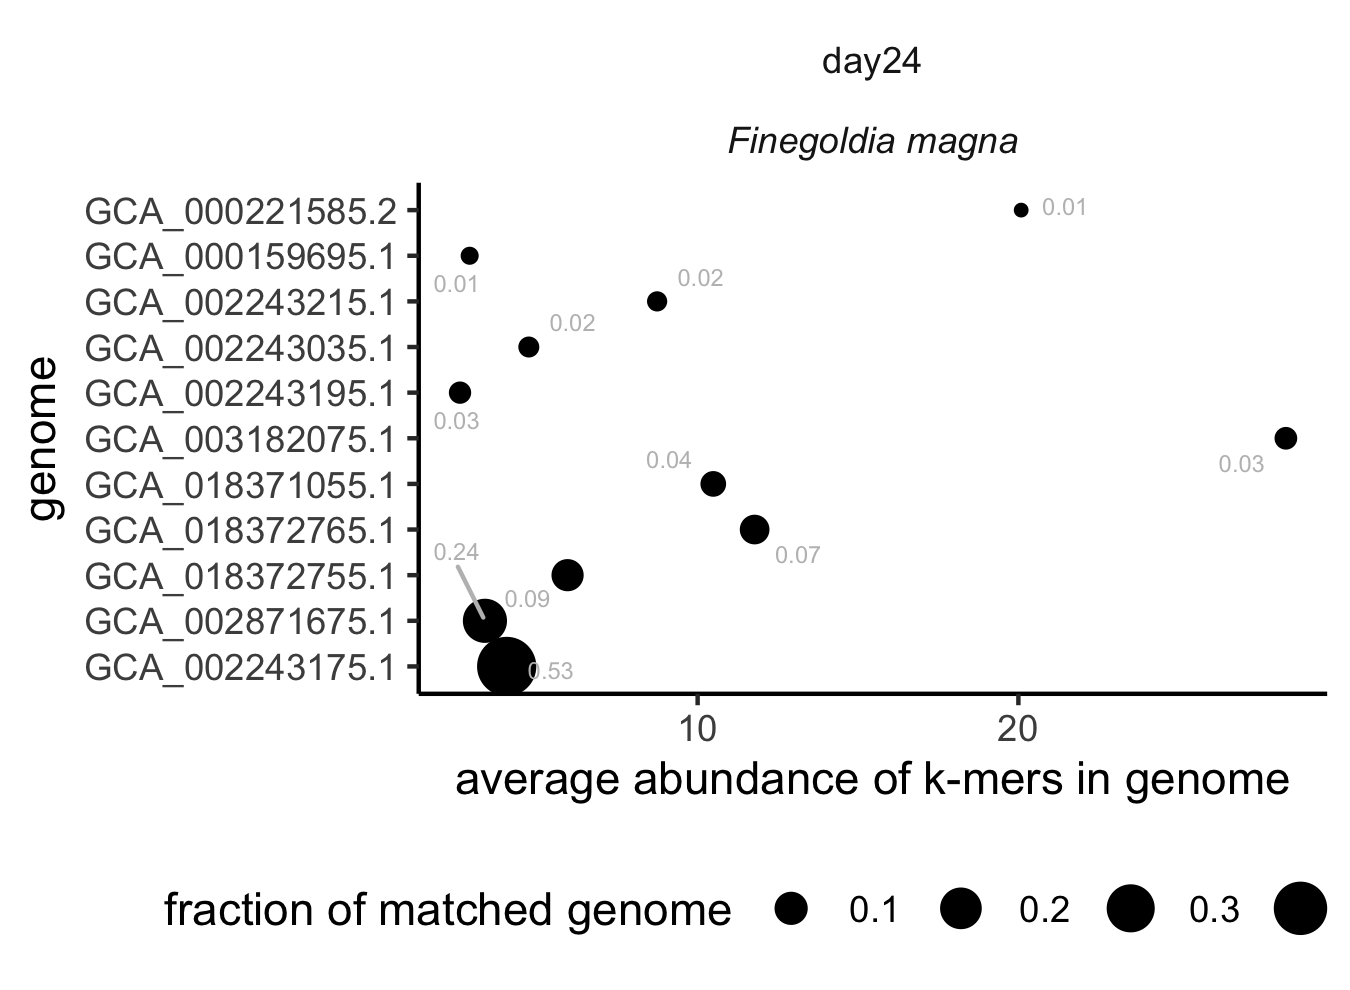

In [14]:
# adjust plot size rendered inline
options(repr.plot.width = 4.5, repr.plot.height = 3.3, repr.plot.res = 300)

infant_multi_strain_f_magna$plt +
 theme(legend.position = "bottom",
       strip.text = element_text(face = "italic")) +
 labs(size = "fraction of matched genome")

In [15]:
length(unique(infant_taxonomy_annotate_df$query_name))

[1] 11